In [1]:
%matplotlib notebook


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

In [3]:
def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

<IPython.core.display.Javascript object>


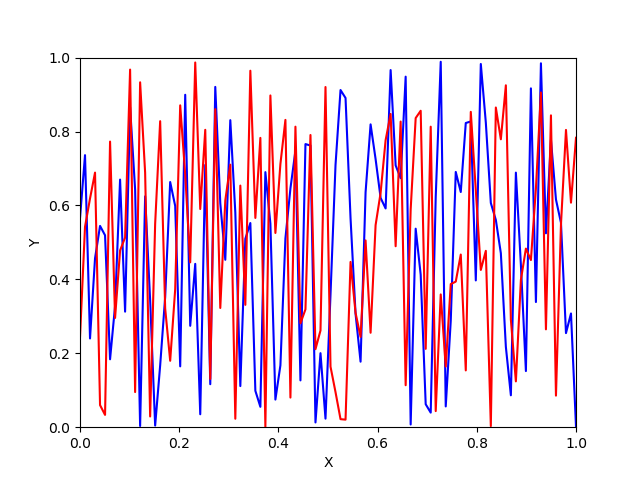

In [4]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
#     time.sleep(1)


<IPython.core.display.Javascript object>


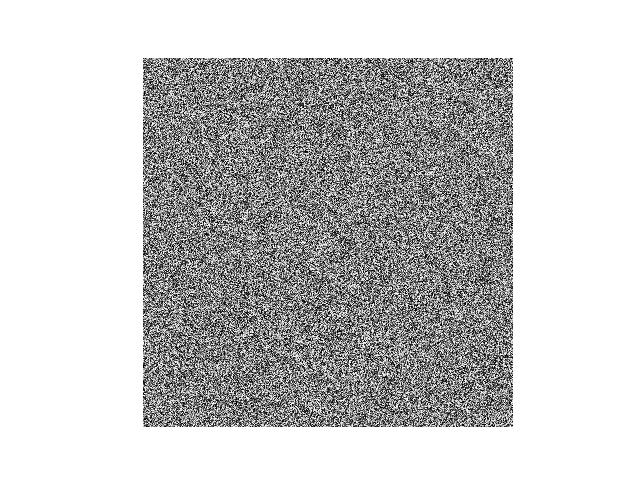

In [4]:
def plthm(a):
    a = np.random.random((400, 400))
    plt.imshow(a, cmap='binary', interpolation='nearest')
    plt.show()
    fig.canvas.draw()
    
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.axis('off')

for f in range(10):
    plthm(1)
    time.sleep(0.1)

In [6]:
# plthm()

In [107]:
class DiffMatrix():
    
    def __init__(self,
                size= 300,
                seed = 42,
                diffusion_characteristics = 'default'):
#       Reaction caracteristics
        if diffusion_characteristics == 'default':
            self.diff_a = 1
            self.diff_b = 0.5
            self.feed_rate = 0.055
            self.kill_rate = 0.062
            self.timestep = 1
            self.diff_func = self.laplacian2D

            self.size = size
            self.matrix_shape = (int(self.size), int(self.size))
            self.seed= seed
            self.matrix_a = self.initiate_matrix()
            self.matrix_b = self.initiate_matrix()
            self.matrix_a_new = self.initiate_matrix()
            self.matrix_b_new = self.initiate_matrix()
       
    def fill_matrix_tiny(self):
        self.matrix_a[1][2] = 0.3
        self.matrix_a[1][3] = 0.3
        self.matrix_a[2][2] = 0.3

    def fill_matrix_random(self):
        self.matrix_a = np.random.rand(*self.matrix_shape)
        self.matrix_b = np.random.rand(*self.matrix_shape)

        
    def initiate_matrix(self):
        matrix = np.zeros(self.matrix_shape)
        return matrix
        
            
    def diffuse(self):
        # diffuse trough the space
        self.diffuse_a = self.matrix_a * self.laplacian2D(self.matrix_a) * self.diff_a
        self.diffuse_b = self.matrix_b * self.laplacian2D(self.matrix_b) * self.diff_b
        
    def react(self):
        #consume a and turn it into b
        self.react_a = self.matrix_a * self.matrix_b * self.matrix_b
        self.react_b = self.matrix_a * self.matrix_b * self.matrix_b
        
    def feed(self):
        # create a up until 1
        self.feed_a = self.feed_rate * (1- self.matrix_a)
        #bestroy b if any
        self.feed_b = (self.feed_rate + self.kill_rate)* self.matrix_b

    
    def find_multiplier(self,x,y):
        multi_dict = {
            0: -1,
            1: 0.2,
            2: 0.05
        }
        total = abs(x) + abs(y)
        return multi_dict[total]
    
        
    def laplacian2D(self, matrix):
        x_coord = (-1,0,1)
        y_coord = (-1,0,1)
        matrix_new = np.empty(self.matrix_shape)
        
        for x in x_coord:
            rolled_x = np.roll(matrix,x,axis=0)
            for y in y_coord:
                multi = self.find_multiplier(x,y)
                rolled_y = np.roll(rolled_x,y,axis=1)
                matrix_new += (multi * rolled_y)
#                 print(f'x:{x} y:{y}')
#                 print(multi * rolled_y)
#                 print(matrix_new)
        return matrix_new
    
        
    def _next(self):
        print('=== start')
        print(self.matrix_a)
        print('diff')
        self.diffuse()
        print(self.diffuse_a)
        print('react')
        self.react()
        print(self.react_a)
        print('feed')
        self.feed()
        print(self.feed_a)
        print('update')
        self.matrix_a += self.diffuse_a - self.react_a + self.feed_a
        self.matrix_b += self.diffuse_b + self.react_b - self.feed_b
        


In [162]:
dm = DiffMatrix(size = 3)
dm.fill_matrix_random()
print(dm.matrix_a)
print(dm.matrix_b)

[[0.01220121 0.24712451 0.94774273]
 [0.31669394 0.38488791 0.58380213]
 [0.81524735 0.331385   0.29534093]]
[[0.30082609 0.62874498 0.62836082]
 [0.36916827 0.87278975 0.73376682]
 [0.09353123 0.51040839 0.76769733]]


In [171]:
dm._next()
print(dm.matrix_a)
print(dm.matrix_b)

=== start
[[-6.85126379e-01  7.99763387e-02 -2.23071950e-02]
 [ 3.78978974e-02  4.01213920e-02  8.41148277e-02]
 [ 1.66964803e+02  2.12415113e-01  6.32137329e-02]]
diff
[[-23.84398749   0.66112617  -0.18550244]
 [  1.26190325   0.33697596   0.70255972]
 [-10.89022235   7.0947395    2.11269453]]
react
[[-4.99745130e+00  4.70301890e-02 -1.13655054e-01]
 [ 7.35860430e-02  3.92241074e-02  8.60542662e-02]
 [ 7.44757400e+06  2.81459514e-02  6.69608496e-02]]
feed
[[ 0.09268195  0.0506013   0.0562269 ]
 [ 0.05291562  0.05279332  0.05037368]
 [-9.12806416  0.04331717  0.05152324]]
update
[[-1.94389806e+01  7.44673619e-01 -3.79276838e-02]
 [ 1.27913072e+00  3.90666568e-01  7.50993971e-01]
 [-7.44742706e+06  7.32232583e+00  2.16047065e+00]]
[[-6.36401882e+01 -3.41119573e+00  5.83709196e+00]
 [-2.85053635e+01 -4.40882430e+00 -4.65608589e+00]
 [ 7.42731132e+06 -7.31701369e+00 -2.12584476e+01]]


In [164]:
dm.matrix_a

array([[0.07207725, 0.2985356 , 0.87978936],
       [0.45372469, 0.27922252, 0.56046595],
       [1.06228212, 0.42814793, 0.33242012]])

In [10]:
dm = DiffMatrix(size = 50)
dm.fill_matrix_random()

<IPython.core.display.Javascript object>


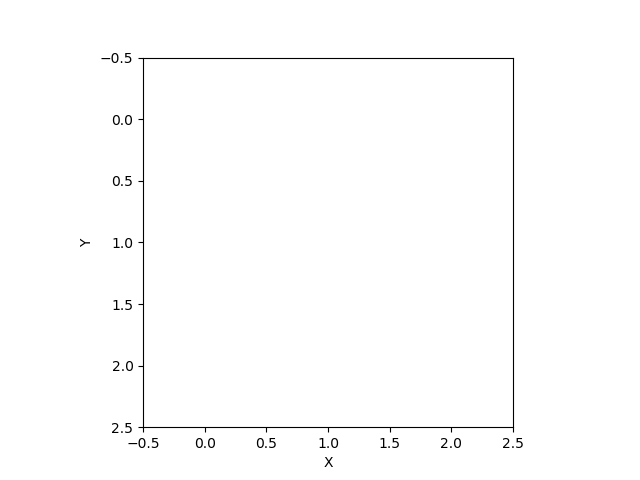

100%|██████████| 1/1 [00:00<00:00, 99.70it/s]

=== start
[[1.41726665 1.41726665 1.41726665]
 [1.41726665 1.41726665 1.41726665]
 [1.41726665 1.41726665 1.41726665]]
diff
[[2.00864477 2.00864477 2.00864477]
 [2.00864477 2.00864477 2.00864477]
 [2.00864477 2.00864477 2.00864477]]
react
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
feed
[[-0.02294967 -0.02294967 -0.02294967]
 [-0.02294967 -0.02294967 -0.02294967]
 [-0.02294967 -0.02294967 -0.02294967]]
update


In [158]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
# plt.axis('off')

for i in tqdm(range(1)):
    plt.imshow(dm.matrix_a, cmap='binary', interpolation='nearest')
    plt.show()
    dm._next()


In [ ]:
dm.matrix_a

In [149]:
A = np.arange(25).reshape(5, 5)

In [150]:
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [7]:
np.roll(A,1,axis=0) # shifts everything down

array([[20, 21, 22, 23, 24],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [ ]:
np.roll(A,1,axis=1) # shifts everything right

In [137]:
B = A

In [138]:
B +2

array([[ 2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21],
       [22, 23, 24, 25, 26]])

In [156]:
A = A ** 2 

In [157]:
A

array([[           0,            1,          256,         6561,
               65536],
       [      390625,      1679616,      5764801,     16777216,
            43046721],
       [   100000000,    214358881,    429981696,    815730721,
          1475789056],
       [  2562890625,   4294967296,   6975757441,  11019960576,
         16983563041],
       [ 25600000000,  37822859361,  54875873536,  78310985281,
        110075314176]])

In [13]:
A_r = np.roll(A,0,axis=0)
A_r

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [17]:
np.roll(A_r,0,axis=1)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])